In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from pandas_datareader import data as wb 
from scipy.stats import norm

In [2]:
df1 = pd.read_csv("tesla.csv",names = ["Open","High","Low","Close","Volume"])
df1_2 = pd.read_csv("GOOGL.csv",names = ["Open","High","Low","Close","Volume"])
df1_3 = pd.read_csv("AAPL.csv",names = ["Open","High","Low","Close","Volume"])
df1_4 = pd.read_csv("NFLX.csv",names = ["Open","High","Low","Close","Volume"])
df1_5 = pd.read_csv("FB.csv",names = ["Open","High","Low","Close","Volume"])
df1["mean_stock"] = ((2*df1["Close"]) + df1["High"]+df1["Low"])/4
df1_2["mean_stock"] = ((2*df1_2["Close"]) + df1_2["High"]+df1_2["Low"])/4
df1_3["mean_stock"] = ((2*df1_3["Close"]) + df1_3["High"]+df1_3["Low"])/4
df1_4["mean_stock"] = ((2*df1_4["Close"]) + df1_4["High"]+df1_4["Low"])/4
df1_5["mean_stock"] = ((2*df1_5["Close"]) + df1_5["High"]+df1_5["Low"])/4

In [3]:
df1 = df1.reset_index()
df1_2 = df1_2.reset_index()
df1_3 = df1_3.reset_index()
df1_4 = df1_4.reset_index()
df1_5 = df1_5.reset_index()

In [4]:
df1 = df1[:600]
df1_2 = df1_2[:600]
df1_3 = df1_3[:600]
df1_4 = df1_4[:600]
df1_5 = df1_5[:600]

In [5]:
df2 = pd.read_csv("SP500.csv", delimiter = "\t")
df2 = df2[:600]

In [6]:
df2.columns

Index(['observation_date', 'SP500'], dtype='object')

In [7]:
l1 = list(np.asarray(df1['mean_stock']))
l2 = list(np.asarray(df1_2['mean_stock']))
l3 = list(np.asarray(df1_3['mean_stock']))
l4 = list(np.asarray(df1_4['mean_stock']))
l5 = list(np.asarray(df1_5['mean_stock']))
l6 = list(np.asarray(df2['SP500']))

In [8]:
df3 = pd.DataFrame({'mean_stock_tesla': l1})

In [9]:
df3['mean_stock_google'] = l2
df3['mean_stock_apple'] = l3
df3['mean_stock_netflix'] = l4
df3['mean_stock_facebook'] = l5

In [10]:
df3['SP500'] = l6

In [11]:
df3['SP500'].fillna(method = 'ffill', inplace = True)

In [12]:
df3.columns

Index(['mean_stock_tesla', 'mean_stock_google', 'mean_stock_apple',
       'mean_stock_netflix', 'mean_stock_facebook', 'SP500'],
      dtype='object')

In [18]:
Y = df3.iloc[:,5]
X = df3.iloc[:,[0,1,2,3,4]]
Y = pd.DataFrame(Y)
X = pd.DataFrame(X)
Y = np.matrix(Y)
X = np.matrix(X)

In [19]:
bh = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
#(X’X)^(-1)X’Y to calculate OLS coefficient estimates

In [20]:
bh

matrix([[-0.39805151],
        [ 3.07812293],
        [-1.39198259],
        [-1.21060185],
        [ 0.50422778]])

In [21]:
Y_pred = X*bh

In [22]:
Y_pred

matrix([[ 2023.14711464],
        [ 2034.04682948],
        [ 2019.92810028],
        [ 1977.29329872],
        [ 1960.23852644],
        [ 1941.18136473],
        [ 1972.64362331],
        [ 1937.83298861],
        [ 1938.66834933],
        [ 1896.68553337],
        [ 1904.40320555],
        [ 1900.64773278],
        [ 1943.50833696],
        [ 1998.8689914 ],
        [ 1982.65263468],
        [ 1971.6524922 ],
        [ 1989.13283817],
        [ 2017.10422758],
        [ 2073.6066523 ],
        [ 2203.97676502],
        [ 2171.00832887],
        [ 2077.46523926],
        [ 2001.13871054],
        [ 1933.65040531],
        [ 1906.34597916],
        [ 1921.42734018],
        [ 1936.6233479 ],
        [ 1923.5579504 ],
        [ 1934.13605643],
        [ 1957.14314321],
        [ 1979.49446027],
        [ 1960.87913207],
        [ 1961.39999349],
        [ 1983.41442596],
        [ 1958.59915243],
        [ 1950.15456745],
        [ 1966.95576666],
        [ 1965.52755273],
        [ 19

In [25]:
df3['Y_predicted'] = Y_pred

In [26]:
df3

,mean_stock_tesla,mean_stock_google,mean_stock_apple,mean_stock_netflix,mean_stock_facebook,SP500,Y_predicted
0,226.9200,760.2600,104.8125,109.3150,102.2025,2012.66,2023.147115
1,223.0975,761.9775,103.1050,108.0975,102.6800,2016.71,2034.046829
2,219.5575,758.6325,100.9925,114.8625,102.7150,1990.26,2019.928100
3,215.1550,743.3725,96.8125,115.8425,98.6550,1943.09,1977.293299
4,213.2875,736.7475,97.4475,112.6850,97.9725,1922.03,1960.238526
5,208.0775,731.1700,98.4650,114.5375,97.3700,1923.67,1941.181365
6,210.2575,742.8375,99.8750,116.6400,99.2025,1938.68,1972.643623
7,203.6625,727.2300,98.2725,108.5700,96.4375,1890.28,1937.832989
8,204.3700,726.7375,98.6800,106.1150,96.8900,1921.84,1938.668349
9,202.9225,711.6625,96.9950,104.1100,95.0475,1880.33,1896.685533


In [35]:
df2['observation_date'] = pd.to_datetime(df2['observation_date'])

In [36]:
l7 = list(np.asarray(df2['observation_date']))

In [37]:
df3['observation_date'] = l7

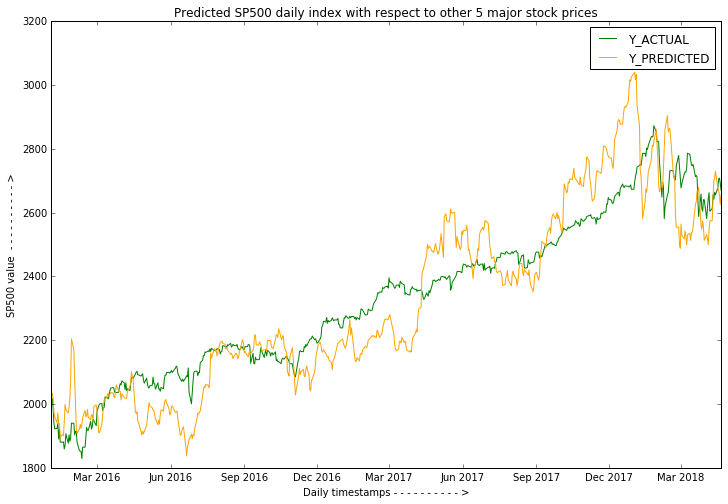

In [38]:
#plot
fig = plt.figure(figsize=(12,8))
plt.plot(df3['observation_date'], df3['SP500'], label = 'Y_ACTUAL', color = 'green')
plt.plot(df3['observation_date'], df3['Y_predicted'], label = 'Y_PREDICTED', color = 'orange')
plt.title('Predicted SP500 daily index with respect to other 5 major stock prices')
plt.xlabel('Daily timestamps - - - - - - - - - - >')
plt.ylabel('SP500 value  - - - - - - - - - - >')
plt.legend()
plt.show()

In [40]:
residuals = np.matrix(Y - Y_pred)

In [41]:
residuals

matrix([[ -1.04871146e+01],
        [ -1.73368295e+01],
        [ -2.96681003e+01],
        [ -3.42032987e+01],
        [ -3.82085264e+01],
        [ -1.75113647e+01],
        [ -3.39636233e+01],
        [ -4.75529886e+01],
        [ -1.68283493e+01],
        [ -1.63555334e+01],
        [ -2.40732056e+01],
        [ -1.93177328e+01],
        [ -8.41783370e+01],
        [ -1.29878991e+02],
        [ -7.57526347e+01],
        [ -9.45724922e+01],
        [ -8.55028382e+01],
        [ -1.34154228e+02],
        [ -1.80246652e+02],
        [ -2.63736765e+02],
        [ -2.31628329e+02],
        [ -1.74435239e+02],
        [ -8.86087105e+01],
        [ -1.82004053e+01],
        [ -2.62959792e+01],
        [ -6.79873402e+01],
        [ -8.44133479e+01],
        [ -7.16979504e+01],
        [ -1.05056056e+02],
        [ -9.23631432e+01],
        [ -1.14714460e+02],
        [ -6.52991321e+01],
        [ -3.45799935e+01],
        [ -6.55844260e+01],
        [ -4.08191524e+01],
        [ -4.6545674

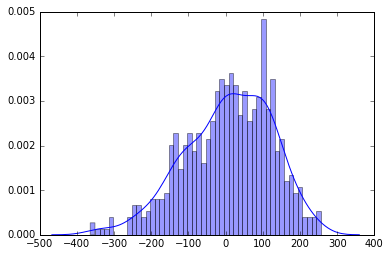

In [59]:
#plot residuals - how normally distributed residuals influence regression details
#heteroskedasticity plot
import seaborn as sns
sns.distplot((residuals),bins=50)

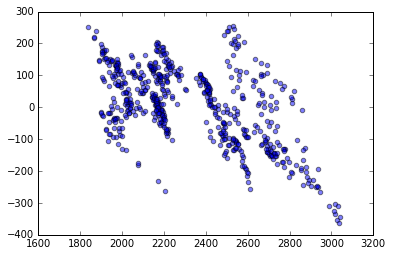

In [58]:
plt.scatter(Y_pred, residuals, alpha=0.5)
plt.show()

In [44]:
n_samples = X.shape[0]

In [46]:
#VAR(Y - Y_pred)

from numpy.linalg import inv              
variance = ((1/n_samples)*(residuals.T))*(residuals)

In [47]:
from numpy import sqrt
std = sqrt(variance)
std

matrix([[ 117.07762649]])

In [82]:
from numpy import var
R_square = (1 - residuals.T*residuals)/(n_samples*var(Y))
R_square = np.matrix(R_square)
R_square

matrix([[-0.22613187]])

In [83]:
from numpy import size
N = np.size(X, 1)
adj_R_square = 1-(1-R_square)*(n_samples-1)/(n_samples-N);
adj_R_square

matrix([[-0.23437478]])

Bollinger Bounds:
lower bound : y_pred - c*std.      -----   c = 1 (bound fixed 1 standard deviation away)
upper bound : y_pred + c*std       

In [52]:
df3['Bollinger_lower'] = df3['Y_predicted'].apply(lambda x : x - std)
df3['Bollinger_upper'] = df3['Y_predicted'].apply(lambda x : x + std)

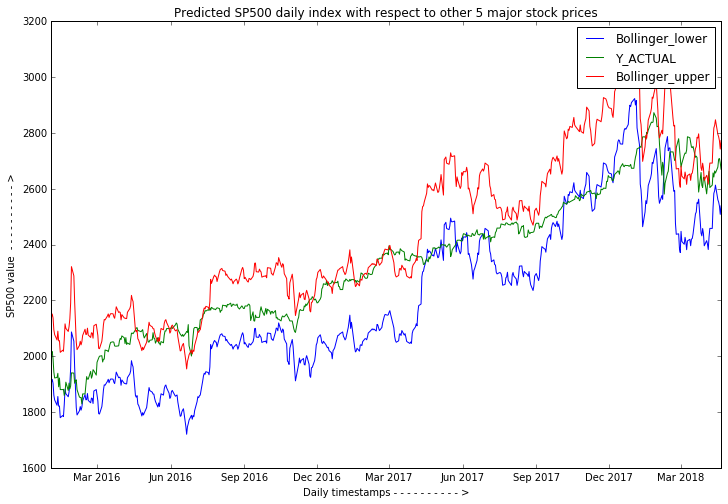

In [62]:
fig = plt.figure(figsize=(12,8))
plt.plot(df3['observation_date'], df3['Bollinger_lower'], label = 'Bollinger_lower', color = 'blue')
plt.plot(df3['observation_date'], df3['SP500'], label = 'Y_ACTUAL', color = 'green')
plt.plot(df3['observation_date'], df3['Bollinger_upper'], label = 'Bollinger_upper', color = 'red')
plt.title('Predicted SP500 daily index with respect to other 5 major stock prices')
plt.xlabel('Daily timestamps - - - - - - - - - - >')
plt.ylabel('SP500 value  - - - - - - - - - - >')
plt.legend()
plt.show()

In [ ]:
#bollinger explanation

In [60]:
df3['MA_5'] = df3['SP500'].rolling(window=5).mean()
df3['MA_20'] = df3['SP500'].rolling(window=20).mean()

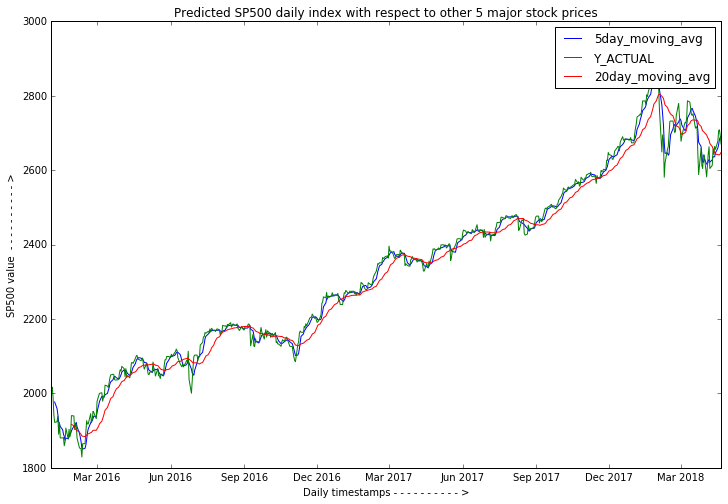

In [63]:
fig = plt.figure(figsize=(12,8))
plt.plot(df3['observation_date'], df3['MA_5'], label = '5day_moving_avg', color = 'blue')
plt.plot(df3['observation_date'], df3['SP500'], label = 'Y_ACTUAL', color = 'green')
plt.plot(df3['observation_date'], df3['MA_20'], label = '20day_moving_avg', color = 'red')
plt.title('Predicted SP500 daily index with respect to other 5 major stock prices')
plt.xlabel('Daily timestamps - - - - - - - - - - >')
plt.ylabel('SP500 value  - - - - - - - - - - >')
plt.legend()
plt.show()

In [66]:
start_date = '2017-08-01'
end_date = '2018-08-01'
mask = (df3['observation_date'] > start_date) & (df3['observation_date'] <= end_date)
df_masked1 = df3.loc[mask]

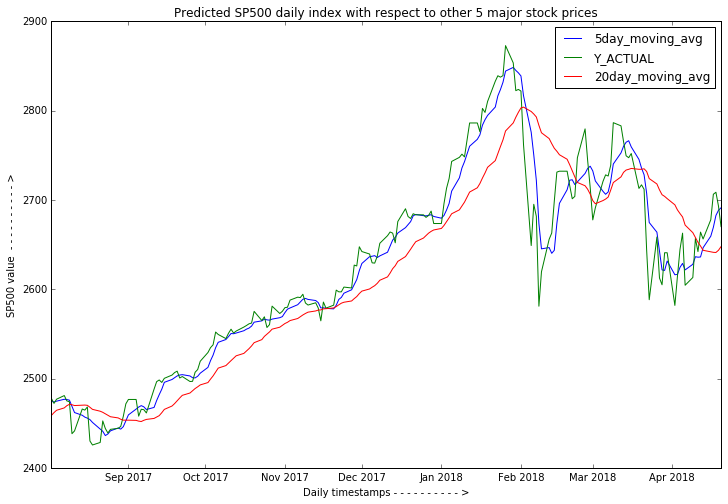

In [68]:
fig = plt.figure(figsize=(12,8))
plt.plot(df_masked1['observation_date'], df_masked1['MA_5'], label = '5day_moving_avg', color = 'blue')
plt.plot(df_masked1['observation_date'], df_masked1['SP500'], label = 'Y_ACTUAL', color = 'green')
plt.plot(df_masked1['observation_date'], df_masked1['MA_20'], label = '20day_moving_avg', color = 'red')
plt.title('Predicted SP500 daily index with respect to other 5 major stock prices')
plt.xlabel('Daily timestamps - - - - - - - - - - >')
plt.ylabel('SP500 value  - - - - - - - - - - >')
plt.legend()
plt.show()

In [69]:
# Moving Average based training signals for Apple stock
short_window = 8
long_window = 20

signals = pd.DataFrame(index=df3.index)
signals['signal'] = 0.0

signals['short_mavg'] = df3['mean_stock_apple'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = df3['mean_stock_apple'].rolling(window=long_window, min_periods=1, center=False).mean()
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   
signals['positions'] = signals['signal'].diff()

In [70]:
print(signals)

     signal  short_mavg   long_mavg  positions
0       0.0  104.812500  104.812500        NaN
1       0.0  103.958750  103.958750        0.0
2       0.0  102.970000  102.970000        0.0
3       0.0  101.430625  101.430625        0.0
4       0.0  100.634000  100.634000        0.0
5       0.0  100.272500  100.272500        0.0
6       0.0  100.215714  100.215714        0.0
7       0.0   99.972813   99.972813        0.0
8       0.0   99.206250   99.829167        0.0
9       0.0   98.442500   99.545750        0.0
10      0.0   97.935625   99.308636        0.0
11      0.0   97.898750   99.076042        0.0
12      0.0   97.649063   98.797115        0.0
13      0.0   97.948125   98.944286        0.0
14      0.0   97.965313   99.015500        0.0
15      0.0   98.031250   99.002031        0.0
16      0.0   97.520000   98.742500        0.0
17      0.0   97.098125   98.457917        0.0
18      0.0   97.036250   98.351842        0.0
19      0.0   97.007812   98.248750        0.0
20      0.0  

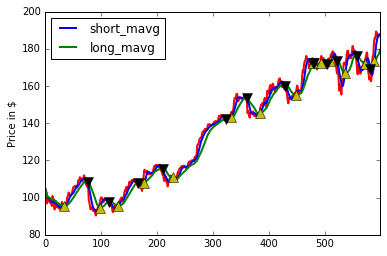

In [72]:
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price in $')
df3['mean_stock_apple'].plot(ax=ax1, color='r', lw=2.)


signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='y')

ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')o
         
plt.show()

In [74]:
df_masked2 = df_masked1[['mean_stock_tesla','mean_stock_apple','mean_stock_google','mean_stock_netflix', 'mean_stock_facebook','SP500']]

In [77]:
df_masked2.columns = ['TSLA','AAPL','GOOGL','NFLX','FB','SP500']

In [88]:
df_temp = df_masked2[['TSLA','AAPL','NFLX','SP500']]

In [89]:
rets = df_temp.pct_change()
print(rets)

         TSLA      AAPL      NFLX     SP500
412       NaN       NaN       NaN       NaN
413  0.023981  0.001192 -0.003419 -0.002184
414  0.012462 -0.000235  0.000876  0.001889
415 -0.010171  0.001724 -0.012598  0.001647
416 -0.016940  0.004726  0.001127 -0.002414
417  0.006336  0.011448  0.009172 -0.000364
418  0.017080  0.005944  0.030701 -0.014474
419  0.010362  0.004455  0.009063  0.001276
420 -0.000253  0.000732  0.000543  0.010044
421 -0.014156 -0.011635 -0.002544 -0.000499
422 -0.012704 -0.003852  0.019045  0.001420
423  0.010055 -0.002088  0.006609 -0.015437
424 -0.013133 -0.012385 -0.007809 -0.001835
425  0.043562  0.012697  0.018952  0.001163
426  0.010528 -0.000883  0.018682  0.009941
427  0.003782 -0.011323 -0.002238 -0.003454
428  0.019107 -0.007123 -0.005792 -0.002074
429  0.017620  0.009923  0.000150  0.001673
430  0.015280 -0.004835  0.008750  0.000487
431 -0.021010 -0.001761  0.004771  0.000843
432 -0.004626 -0.014868 -0.000594  0.004615
433 -0.015585 -0.016771  0.01541

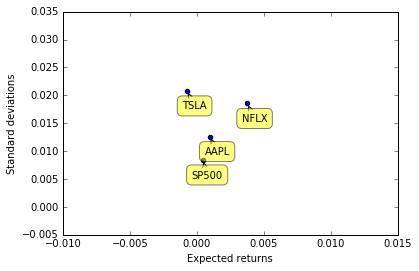

In [90]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()